In [1]:
# to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
pd.pandas.set_option("display.max_columns",None)

# Reading Dataset

In [3]:
car=pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# using profiling

In [6]:
a=ProfileReport(car)

In [7]:
#a.to_widgets()

In [8]:
# Get rid of "car_ID" as it is not required it is for indexing only
car.drop("car_ID",axis=1,inplace=True)

In [9]:
# Separate categorial and num variable
num_var=[i for i in car.columns if car[i].dtype!="O"]
cat_var=[i for i in car.columns if i not in num_var]

In [10]:
car[cat_var].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [11]:
car[num_var].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# Separate Continous and discrete variable from num features
#cont_var=
cont_var=[i for i in num_var if len(car[i].unique())>35 ]
car[cont_var].head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,16500.0


In [13]:
dist_var=[i for i in num_var if i not in cont_var]
car[dist_var].head(3)

,symboling,compressionratio,peakrpm,citympg,highwaympg
0,3,9.0,5000,21,27
1,3,9.0,5000,21,27
2,1,9.0,5000,19,26


# Data Analysis

### Check for outliers in discrete data

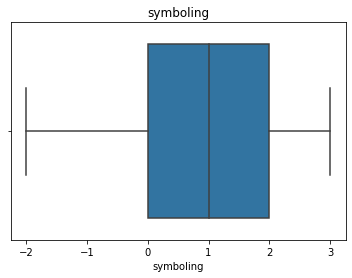

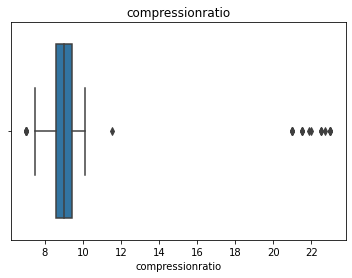

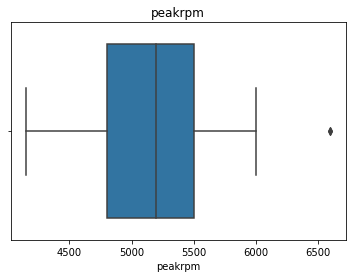

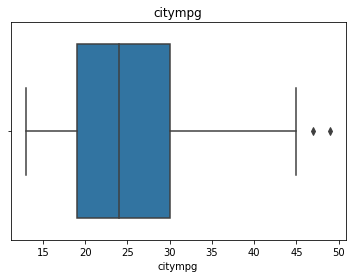

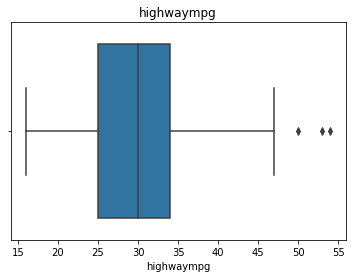

In [14]:
for i in dist_var:
    sns.boxplot(i,data=car)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

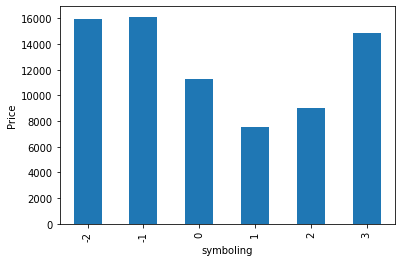

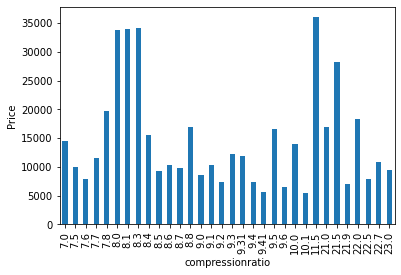

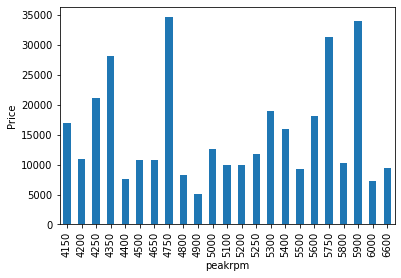

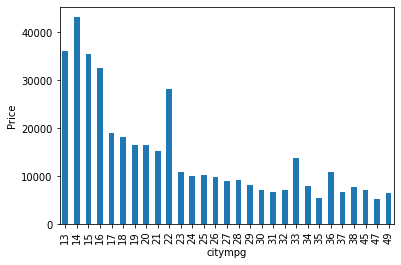

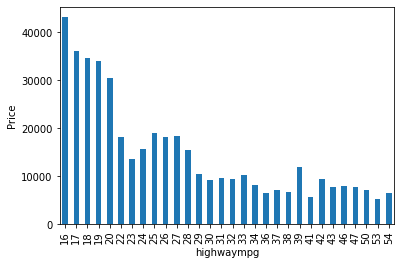

In [15]:
# lets check the realtion with the dependent variable i.e price
for i in dist_var:
    df=car.copy()
    car.groupby(i)["price"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

In [16]:
dist_var

['symboling', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg']

# Lets check scatter plot for discrete

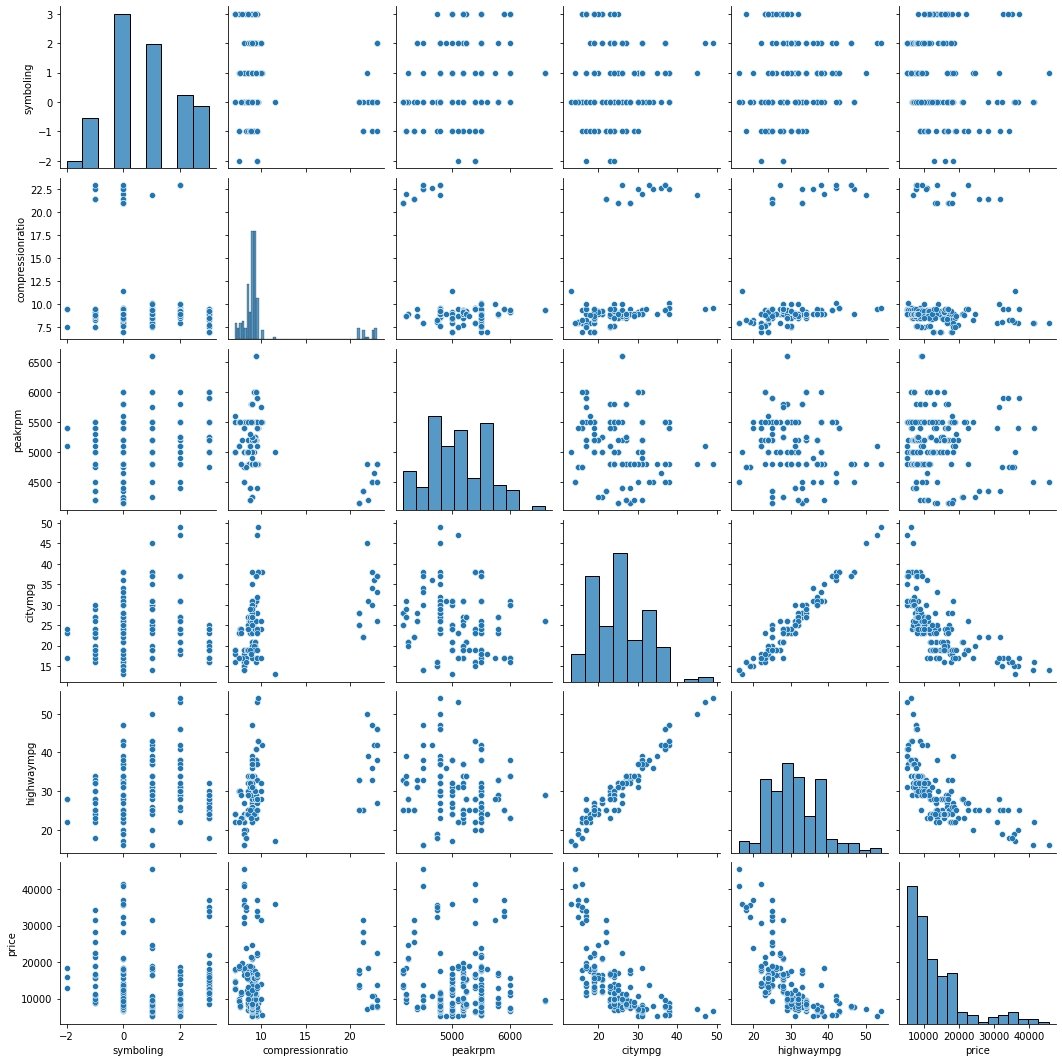

In [17]:
# lets check scatter plot for discrete
sns.pairplot(car[['symboling', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg','price']])
plt.show()

# Lets check scatter plot for continous to

In [18]:
cont_var

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'price']

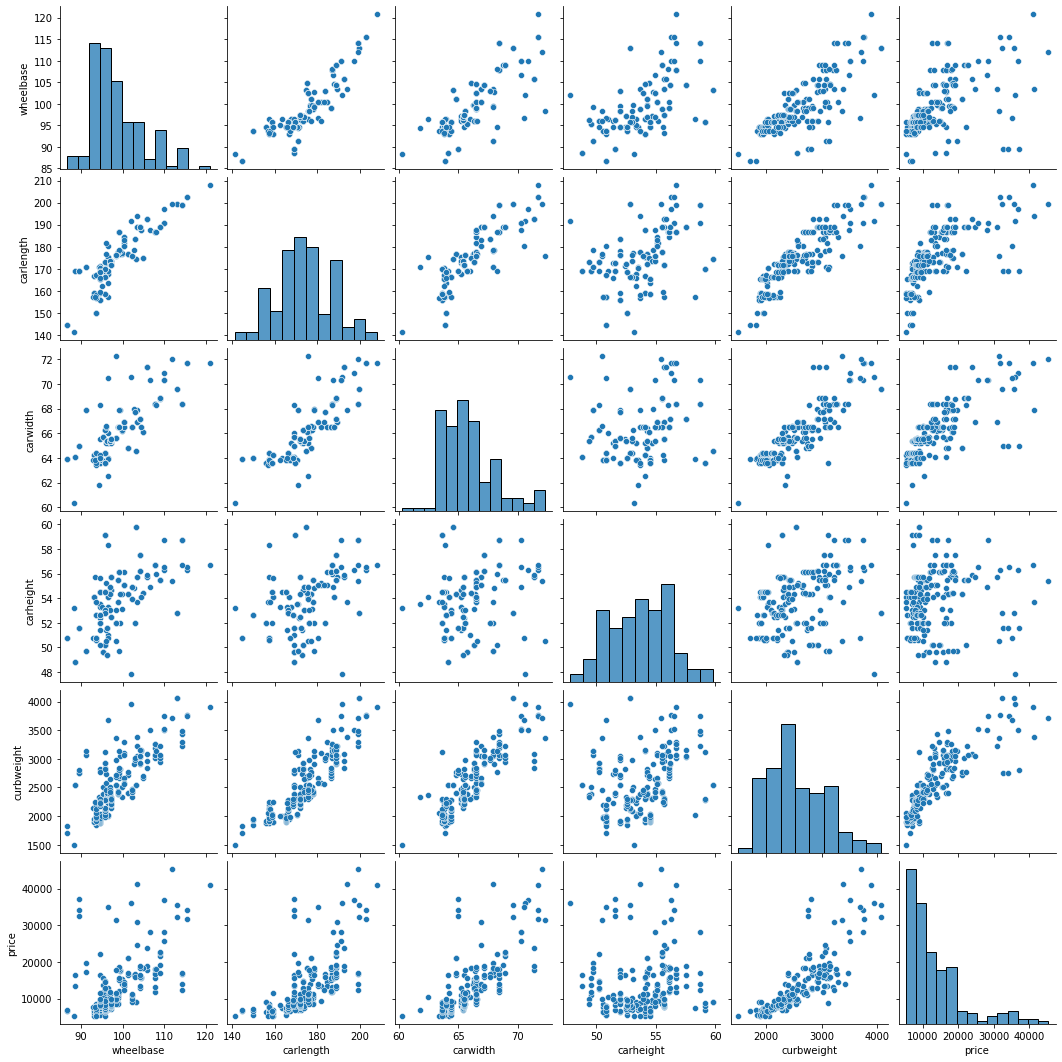

In [19]:
sns.pairplot(car[['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight','price']])
plt.show()

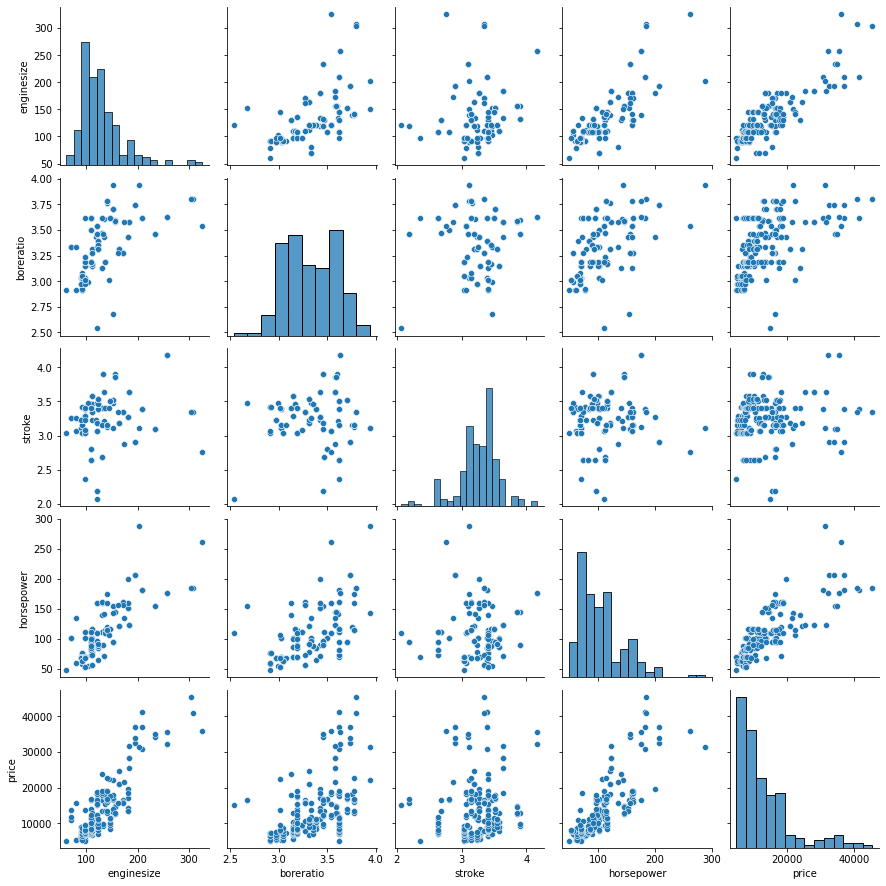

In [20]:
sns.pairplot(car[['enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'price']])
plt.show()

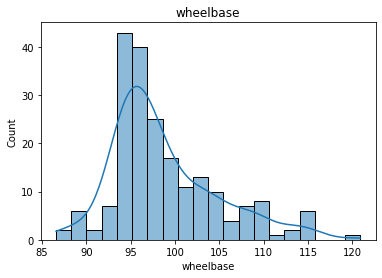

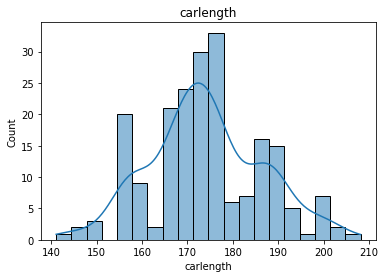

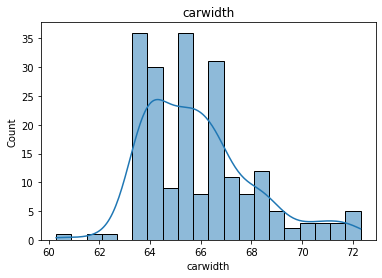

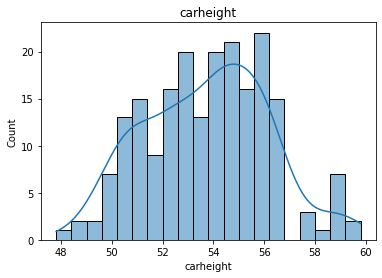

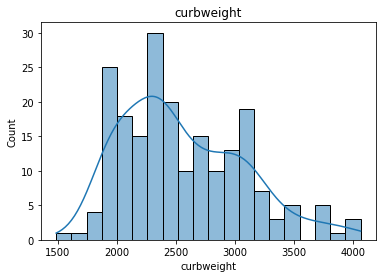

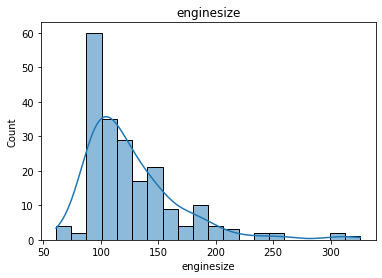

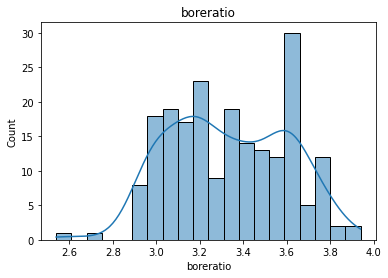

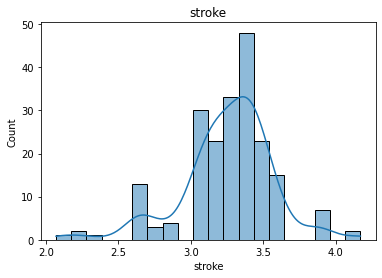

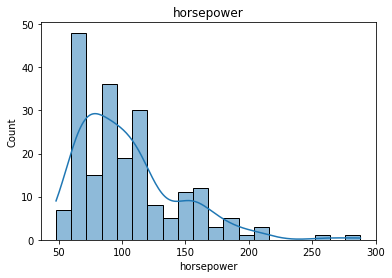

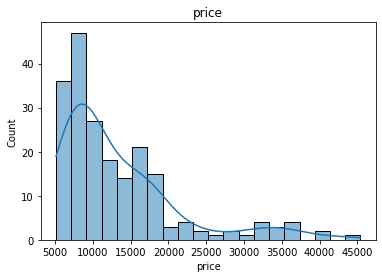

In [21]:
# build chart for ontinous variables as well
for i in cont_var:
    sns.histplot(x=i,kde=True,bins=20,data=car)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

# EDA

In [22]:
car[cat_var].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [23]:
for i in car[cat_var]:
    val=car[i].unique()
    print("{} value is {}".format(i,val))

CarName value is ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' '

In [24]:
# Lets create a new column and extract col name car_name compny from it
df=car.copy()
df["CompanyName"]=[i[0:i.find(" ")] for i in car["CarName"]]
df[["CompanyName"]].head()

,CompanyName
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi


In [25]:
df["CompanyName"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
peugeot        11
volvo          11
subaru         10
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
maxda           2
subar           2
vw              2
Nissan          1
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [26]:
# Here if we check several spelling are mis spelled like nissan and NIssan an volkwagen lets treat them
df["CompanyName"]=np.where(df["CompanyName"]=="Nissan","nissan",df["CompanyName"])

# Alternatively we can do
$ Volkswagen $

In [27]:
df.loc[(df["CompanyName"]=="vw")| (df["CompanyName"]=="vokswagen")]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
182,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2261,ohc,four,97,idi,3.01,3.4,23.0,52,4800,37,46,7775.0,vokswagen
189,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595.0,vw
190,3,vw rabbit,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.4,8.5,90,5500,24,29,9980.0,vw


In [28]:
df.loc[(df["CompanyName"]=="vw")| (df["CompanyName"]=="vokswagen"),"CompanyName"]="volkswagen"

In [29]:
# For toyota 
df.loc[df["CompanyName"]=="toyouta","CompanyName"]="toyota"
# For porsche
df.loc[df["CompanyName"]=="porcshce","CompanyName"]="porsche"
# for mazda
df.loc[df["CompanyName"]=="maxda","CompanyName"]="mazda"
# for subaru
df.loc[df["CompanyName"]=="subar","CompanyName"]="subaru"

In [30]:
df["CompanyName"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [31]:
# lets impute numbering to them accoriding to indexing they apperar i.e nomial data

car_dict={i:k for k,i in enumerate(df["CompanyName"].unique(),1)}
print("{} \n and the type is {}".format(car_dict,type(car_dict)))

{'alfa-romero': 1, 'audi': 2, 'bmw': 3, 'chevrolet': 4, 'dodge': 5, 'honda': 6, 'isuzu': 7, 'jaguar': 8, 'mazda': 9, 'buick': 10, 'mercury': 11, 'mitsubishi': 12, 'nissan': 13, 'peugeot': 14, 'plymouth': 15, 'porsche': 16, 'renault': 17, 'saab': 18, 'subaru': 19, 'toyota': 20, 'volkswagen': 21, 'volvo': 22} 
 and the type is <class 'dict'>


In [32]:
# drop Carname
df.drop("CarName",axis=1,inplace=True)

In [33]:
# drivewheel value is ['rwd' 'fwd' '4wd']
df.loc[df["drivewheel"]=="4wd","drivewheel"]="fwd"

# Create dummy variables


## for cars

In [34]:
cat_var=[i for i in cat_var if i !="CarName"]

In [35]:
sample1=df.copy()
pd.get_dummies(sample1[cat_var],drop_first=True).shape

(205, 28)

#### As studied in feature selection techniques lets fetch first 15 records

In [36]:
top15=df.groupby("CompanyName")["CompanyName"].count().sort_values(ascending=False).head(15).index
top15

Index(['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugeot', 'volvo', 'dodge', 'buick', 'bmw', 'audi',
       'plymouth', 'saab'],
      dtype='object', name='CompanyName')

In [37]:
for i in top15:
    df[i]=np.where(df["CompanyName"]=="toyota",1,0)

In [38]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,buick,bmw,audi,plymouth,saab
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
cat_var

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [40]:
# Lets check again categorial variable 
for i in car[cat_var]:
    val=car[i].unique()
    print("{} value is {}".format(i,val))

fueltype value is ['gas' 'diesel']
aspiration value is ['std' 'turbo']
doornumber value is ['two' 'four']
carbody value is ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel value is ['rwd' 'fwd' '4wd']
enginelocation value is ['front' 'rear']
enginetype value is ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber value is ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem value is ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [41]:
# since doornumber  and cylindernumber  have identical values lets change them as well
dorr_dict={"two":"doornumber_2","four":"doornumber_4"}
dorr_dict

{'two': 'doornumber_2', 'four': 'doornumber_4'}

In [42]:
df["doornumber"]=df["doornumber"].map(dorr_dict)

In [43]:
# Remove CompanyName as well as we alreay create dummy for it
catogry=[i for i in df.columns if df[i].dtype =="O" and i != "CompanyName"]
df[catogry].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,doornumber_2,convertible,rwd,front,dohc,four,mpfi
1,gas,std,doornumber_2,convertible,rwd,front,dohc,four,mpfi
2,gas,std,doornumber_2,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,doornumber_4,sedan,fwd,front,ohc,four,mpfi
4,gas,std,doornumber_4,sedan,fwd,front,ohc,five,mpfi


In [44]:
car_dummy=pd.get_dummies(df[catogry],drop_first=True)
car_dummy.head()

,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
# dropping categorial variables
df.drop(catogry,axis=1,inplace=True)

In [46]:
car_nw=pd.concat([df,car_dummy],axis=1)
car_nw.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,buick,bmw,audi,plymouth,saab,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
# dropping categorial variables
car_nw.drop("CompanyName",axis=1,inplace=True)

In [48]:
car_nw.shape

(205, 58)

In [49]:
car_nw.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,buick,bmw,audi,plymouth,saab,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [50]:
car_nw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   wheelbase                205 non-null    float64
 2   carlength                205 non-null    float64
 3   carwidth                 205 non-null    float64
 4   carheight                205 non-null    float64
 5   curbweight               205 non-null    int64  
 6   enginesize               205 non-null    int64  
 7   boreratio                205 non-null    float64
 8   stroke                   205 non-null    float64
 9   compressionratio         205 non-null    float64
 10  horsepower               205 non-null    int64  
 11  peakrpm                  205 non-null    int64  
 12  citympg                  205 non-null    int64  
 13  highwaympg               205 non-null    int64  
 14  price                    2

# Scaling the features

In [51]:
# I will impliment min-max scaling
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(car_nw,train_size=0.70,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 58)
(62, 58)


In [52]:
#Apply scaler() to all the columns except  'dummy' variables 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [53]:
#Apply scaler() to all the num_ variables except  'dummy' variables 

df[num_var].head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


In [54]:
df_train[num_var]=scaler.fit_transform(df_train[num_var])
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,buick,bmw,audi,plymouth,saab,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.139860,0.909091,0.181818,0.559441,0.020979,0.342657,0.475524,0.132867,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.348061,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.5595

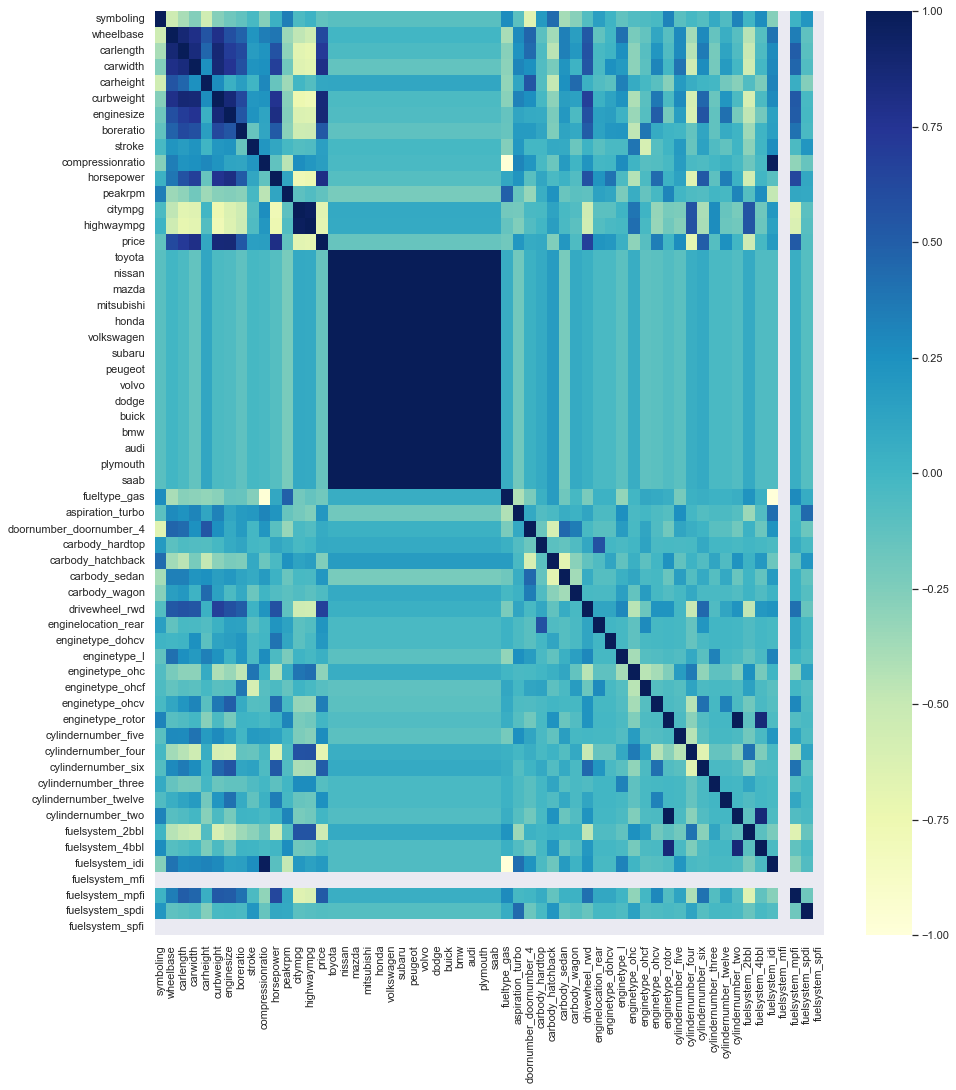

In [55]:
# Check for corealtion
# Check for corelation
sns.set(rc={"figure.figsize":(15,17)})
sns.heatmap(df_train.corr(),cmap="YlGnBu")
plt.show()

## Checking corealation at threshold 0.8

In [56]:
def corr_chck(dataset,threshold):
    col_corr=set()
    data=df_train.copy()
    val=dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if val.iloc[i,j]>threshold:
                col_name=dataset.columns[i]
                col_corr.add(col_name)          
    return col_corr

In [57]:
lst=corr_chck(df_train,0.8)
l=list(lst)
l

['volkswagen',
 'mazda',
 'horsepower',
 'buick',
 'audi',
 'mitsubishi',
 'curbweight',
 'fuelsystem_4bbl',
 'subaru',
 'dodge',
 'carlength',
 'enginesize',
 'highwaympg',
 'nissan',
 'plymouth',
 'volvo',
 'fuelsystem_idi',
 'price',
 'peugeot',
 'bmw',
 'honda',
 'saab',
 'cylindernumber_two',
 'carwidth']

In [58]:
## from oyr analysis from above graphs below are the imp variables
imp_vars=['carlength','carwidth','carheight','curbweight','enginesize','boreratio',"horsepower"]
rem_var=[i for i in l if i not in imp_vars+["price"]]
rem_var

['volkswagen',
 'mazda',
 'buick',
 'audi',
 'mitsubishi',
 'fuelsystem_4bbl',
 'subaru',
 'dodge',
 'highwaympg',
 'nissan',
 'plymouth',
 'volvo',
 'fuelsystem_idi',
 'peugeot',
 'bmw',
 'honda',
 'saab',
 'cylindernumber_two']

### Lets remove these high corelated columns

In [59]:
df_train.drop(rem_var,axis=1,inplace=True)

In [60]:
df_train.shape

(143, 40)

# Model Building

### Separate X-train and y_train

In [61]:
y_train=df_train.pop("price")
X_train=df_train

# Using RFE

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [64]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False  True  True  True  True  True  True  True
 False False  True False False False False False False False  True False
 False  True False  True  True False False False  True  True False False
 False False False]
[16  7  6  1 14  1  1  1  1  1  1  1 18 12  1 15 23  9  8 11 10 13  1  2
 17  1  5  1  1 19  3 20  1  1 22 24 21  4 25]


In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 16),
 ('wheelbase', False, 7),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 18),
 ('toyota', False, 12),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 15),
 ('doornumber_doornumber_4', False, 23),
 ('carbody_hardtop', False, 9),
 ('carbody_hatchback', False, 8),
 ('carbody_sedan', False, 11),
 ('carbody_wagon', False, 10),
 ('drivewheel_rwd', False, 13),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 2),
 ('enginetype_l', False, 17),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 19),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 20),
 ('cylindernumber_three', True, 1),
 ('cylinde

In [66]:
# selecting columns Advised by rfe
cols=X_train.columns[rfe.support_]
cols

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [67]:
len(cols)

15

In [68]:
# Dropped columns
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'citympg', 'toyota',
       'aspiration_turbo', 'doornumber_doornumber_4', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

# Building Stats model

In [69]:
import statsmodels.api as sm

In [70]:
X_train_rfe=X_train[cols]
# Add constatnt
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,fueltype_gas,enginelocation_rear,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_three,cylindernumber_twelve
122,1.0,0.291667,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,1,0,1,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,1,0,1,0,0,0,0
166,1.0,0.308333,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,1,0,0,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,1,0,0,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,1,0,1,0,0,0,0


In [71]:
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.params

const                    0.231528
carwidth                 0.215453
curbweight               0.157826
enginesize               1.377598
boreratio               -0.171351
stroke                  -0.483649
compressionratio        -0.254301
horsepower               0.128176
peakrpm                  0.113246
fueltype_gas            -0.302945
enginelocation_rear      0.208201
enginetype_ohc           0.121507
enginetype_ohcv         -0.125058
enginetype_rotor         0.344792
cylindernumber_three     0.304614
cylindernumber_twelve   -0.489485
dtype: float64

In [72]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.86e-65
Time:                        13:47:58   Log-Likelihood:                 206.56
No. Observations:                 143   AIC:                            -381.1
Df Residuals:                     127   BIC:                            -333.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2315      0.164      1.415      0.160      -0.092       0.555
carwidth                  0.2155      0.062      3.486      0.001       0.093       0.338
curbweight                0.1578      0.080      1.977      0.050      -0.000       0.316
enginesize                1.3776      0.129     10.706      0.000       1.123       1.632
boreratio                -0.1714      0.040     -4.239      0.000      -0.251      -0.091
stroke                   -0.4836      0.053     -9.196      0.000      -0.588      -0.380
compressionratio         -0.2543      0.155     -1.639      0.104      -0.561       0.053
horsepower                0.1282      0.079      1.621      0.107      -0.028       0.285
peakrpm                   0.1132      0.040      2.857      0.005       0.035       0.192
fueltype_gas             -0.3029      0.134     -2.268      0.025      -0.567      -0.039
enginelocation_rear       0.2082      0.070      2.964      0.004       0.069       0.347
enginetype_ohc            0.1215      0.017      7.086      0.000       0.088       0.155
enginetype_ohcv          -0.1251      0.029     -4.263      0.000      -0.183      -0.067
enginetype_rotor          0.3448      0.042      8.242      0.000       0.262       0.428
cylindernumber_three      0.3046      0.065      4.709      0.000       0.177       0.433
cylindernumber_twelve    -0.4895      0.082     -5.959      0.000      -0.652      -0.327
==============================================================================
Omnibus:                       12.899   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.467
Skew:                           0.393   Prob(JB):                     8.02e-06
Kurtosis:                       4.822   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check VIF 

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Lets create a function for vif as we have to chack it again and agai
def vif_chck(X_train):
    vif=pd.DataFrame()
    vif["Feature"]=[i for i in X_train]
    vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values("VIF",ascending=False)
    return vif

In [75]:
vif_chck(X_train_rfe)

,Feature,VIF
2,enginesize,45.23
1,curbweight,44.80
0,carwidth,36.63
8,fueltype_gas,27.61
4,stroke,26.72
6,horsepower,19.02
3,boreratio,17.30
7,peakrpm,11.96
10,enginetype_ohc,7.86
5,compressionratio,6.01


In [76]:
# Lets remove curbweight as it has high p and VIf
X= X_train_rfe.drop("curbweight",axis=1)

In [77]:
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [78]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     116.6
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.14e-65
Time:                        13:47:59   Log-Likelihood:                 204.39
No. Observations:                 143   AIC:                            -378.8
Df Residuals:                     128   BIC:                            -334.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3545      0.153      2.316      0.022       0.052       0.657
carwidth                  0.2770      0.054      5.130      0.000       0.170       0.384
enginesize                1.5100      0.111     13.591      0.000       1.290       1.730
boreratio                -0.1737      0.041     -4.252      0.000      -0.255      -0.093
stroke                   -0.5009      0.052     -9.551      0.000      -0.605      -0.397
compressionratio         -0.3561      0.148     -2.406      0.018      -0.649      -0.063
horsepower                0.1406      0.080      1.764      0.080      -0.017       0.298
peakrpm                   0.1112      0.040      2.775      0.006       0.032       0.191
fueltype_gas             -0.3992      0.126     -3.175      0.002      -0.648      -0.150
enginelocation_rear       0.1859      0.070      2.651      0.009       0.047       0.325
enginetype_ohc            0.1167      0.017      6.799      0.000       0.083       0.151
enginetype_ohcv          -0.1336      0.029     -4.554      0.000      -0.192      -0.076
enginetype_rotor          0.3653      0.041      8.914      0.000       0.284       0.446
cylindernumber_three      0.3024      0.065      4.623      0.000       0.173       0.432
cylindernumber_twelve    -0.5173      0.082     -6.320      0.000      -0.679      -0.355
==============================================================================
Omnibus:                       12.294   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.364
Skew:                           0.432   Prob(JB):                     6.24e-05
Kurtosis:                       4.582   Cond. No.                         89.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif_chck(X)

,Feature,VIF
1,enginesize,36.50
7,fueltype_gas,27.57
0,carwidth,26.72
3,stroke,26.72
5,horsepower,18.70
2,boreratio,17.20
6,peakrpm,11.88
9,enginetype_ohc,7.67
4,compressionratio,5.89
10,enginetype_ohcv,2.05


In [80]:
# Lets remove horsepower as it has high p and VIf
X=X.drop("horsepower",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [81]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     123.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           4.62e-66
Time:                        13:48:00   Log-Likelihood:                 202.68
No. Observations:                 143   AIC:                            -377.4
Df Residuals:                     129   BIC:                            -335.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3932      0.153      2.575      0.011       0.091       0.695
carwidth                  0.2945      0.053      5.506      0.000       0.189       0.400
enginesize                1.6283      0.089     18.228      0.000       1.452       1.805
boreratio                -0.1706      0.041     -4.145      0.000      -0.252      -0.089
stroke                   -0.5103      0.053     -9.702      0.000      -0.614      -0.406
compressionratio         -0.4189      0.145     -2.892      0.004      -0.705      -0.132
peakrpm                   0.1445      0.036      4.055      0.000       0.074       0.215
fueltype_gas             -0.4420      0.124     -3.552      0.001      -0.688      -0.196
enginelocation_rear       0.2036      0.070      2.910      0.004       0.065       0.342
enginetype_ohc            0.1127      0.017      6.570      0.000       0.079       0.147
enginetype_ohcv          -0.1375      0.029     -4.663      0.000      -0.196      -0.079
enginetype_rotor          0.3801      0.040      9.396      0.000       0.300       0.460
cylindernumber_three      0.3067      0.066      4.655      0.000       0.176       0.437
cylindernumber_twelve    -0.5106      0.082     -6.194      0.000      -0.674      -0.348
==============================================================================
Omnibus:                       17.374   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.855
Skew:                           0.567   Prob(JB):                     2.00e-07
Kurtosis:                       4.972   Cond. No.                         86.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif_chck(X)

,Feature,VIF
3,stroke,26.67
6,fueltype_gas,26.00
0,carwidth,25.52
1,enginesize,23.70
2,boreratio,17.07
5,peakrpm,9.37
8,enginetype_ohc,7.51
4,compressionratio,5.06
9,enginetype_ohcv,2.04
12,cylindernumber_twelve,1.72


In [83]:

# Lets remove stroke as it has high p and VIf
X=X.drop("stroke",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [84]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     73.29
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           8.48e-52
Time:                        13:48:00   Log-Likelihood:                 163.50
No. Observations:                 143   AIC:                            -301.0
Df Residuals:                     130   BIC:                            -262.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2262      0.182     -1.245      0.215      -0.586       0.133
carwidth                  0.3392      0.070      4.857      0.000       0.201       0.477
enginesize                1.1416      0.097     11.789      0.000       0.950       1.333
boreratio                -0.0256      0.050     -0.510      0.611      -0.125       0.074
compressionratio         -0.0125      0.182     -0.069      0.945      -0.372       0.347
peakrpm                   0.0818      0.046      1.781      0.077      -0.009       0.173
fueltype_gas             -0.0345      0.153     -0.225      0.822      -0.338       0.269
enginelocation_rear       0.3187      0.090      3.528      0.001       0.140       0.497
enginetype_ohc            0.0342      0.020      1.725      0.087      -0.005       0.073
enginetype_ohcv          -0.0757      0.038     -2.006      0.047      -0.150      -0.001
enginetype_rotor          0.2302      0.049      4.701      0.000       0.133       0.327
cylindernumber_three      0.2366      0.086      2.757      0.007       0.067       0.406
cylindernumber_twelve    -0.2505      0.102     -2.453      0.015      -0.453      -0.048
==============================================================================
Omnibus:                       18.624   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.879
Skew:                           0.588   Prob(JB):                     2.67e-08
Kurtosis:                       5.115   Cond. No.                         77.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif_chck(X)

,Feature,VIF
0,carwidth,25.51
5,fueltype_gas,22.86
1,enginesize,16.73
2,boreratio,15.69
4,peakrpm,9.13
7,enginetype_ohc,5.77
3,compressionratio,3.91
8,enginetype_ohcv,1.96
9,enginetype_rotor,1.46
11,cylindernumber_twelve,1.37


In [86]:
# Lets remove fueltype_gas as it has high p and VIf
X=X.drop("fueltype_gas",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [87]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     80.53
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           9.44e-53
Time:                        13:48:01   Log-Likelihood:                 163.47
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     131   BIC:                            -267.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2661      0.040     -6.646      0.000      -0.345      -0.187
carwidth                  0.3417      0.069      4.978      0.000       0.206       0.478
enginesize                1.1430      0.096     11.870      0.000       0.953       1.334
boreratio                -0.0255      0.050     -0.509      0.612      -0.124       0.074
compressionratio          0.0276      0.035      0.798      0.426      -0.041       0.096
peakrpm                   0.0802      0.045      1.774      0.078      -0.009       0.170
enginelocation_rear       0.3171      0.090      3.534      0.001       0.140       0.495
enginetype_ohc            0.0342      0.020      1.733      0.085      -0.005       0.073
enginetype_ohcv          -0.0763      0.038     -2.034      0.044      -0.150      -0.002
enginetype_rotor          0.2295      0.049      4.713      0.000       0.133       0.326
cylindernumber_three      0.2363      0.085      2.764      0.007       0.067       0.405
cylindernumber_twelve    -0.2590      0.095     -2.737      0.007      -0.446      -0.072
==============================================================================
Omnibus:                       18.876   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.716
Skew:                           0.592   Prob(JB):                     1.76e-08
Kurtosis:                       5.143   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif_chck(X)

,Feature,VIF
0,carwidth,25.49
1,enginesize,16.73
2,boreratio,10.42
4,peakrpm,5.77
6,enginetype_ohc,3.77
3,compressionratio,2.20
7,enginetype_ohcv,1.85
8,enginetype_rotor,1.46
10,cylindernumber_twelve,1.37
5,enginelocation_rear,1.23


In [89]:
# Lets remove boreratio as it has high p and VIf
X=X.drop("boreratio",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [90]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     89.06
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.11e-53
Time:                        13:48:02   Log-Likelihood:                 163.33
No. Observations:                 143   AIC:                            -304.7
Df Residuals:                     132   BIC:                            -272.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2782      0.032     -8.640      0.000      -0.342      -0.214
carwidth                  0.3322      0.066      5.044      0.000       0.202       0.462
enginesize                1.1332      0.094     12.044      0.000       0.947       1.319
compressionratio          0.0301      0.034      0.883      0.379      -0.037       0.098
peakrpm                   0.0858      0.044      1.962      0.052      -0.001       0.172
enginelocation_rear       0.3120      0.089      3.509      0.001       0.136       0.488
enginetype_ohc            0.0386      0.018      2.177      0.031       0.004       0.074
enginetype_ohcv          -0.0695      0.035     -1.989      0.049      -0.139      -0.000
enginetype_rotor          0.2285      0.049      4.710      0.000       0.133       0.324
cylindernumber_three      0.2411      0.085      2.846      0.005       0.074       0.409
cylindernumber_twelve    -0.2558      0.094     -2.717      0.007      -0.442      -0.070
==============================================================================
Omnibus:                       17.439   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.178
Skew:                           0.554   Prob(JB):                     1.03e-07
Kurtosis:                       5.043   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif_chck(X)

,Feature,VIF
0,carwidth,21.59
1,enginesize,15.57
3,peakrpm,5.61
5,enginetype_ohc,3.71
2,compressionratio,2.20
6,enginetype_ohcv,1.70
7,enginetype_rotor,1.45
9,cylindernumber_twelve,1.35
4,enginelocation_rear,1.22
8,cylindernumber_three,1.04


In [92]:
# Lets remove peakrpm as it has high p and VIf
X=X.drop("peakrpm",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()


In [93]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     96.46
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           7.15e-54
Time:                        13:48:02   Log-Likelihood:                 161.28
No. Observations:                 143   AIC:                            -302.6
Df Residuals:                     133   BIC:                            -272.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2418      0.027     -9.090      0.000      -0.294      -0.189
carwidth                  0.3549      0.066      5.417      0.000       0.225       0.484
enginesize                1.0856      0.092     11.817      0.000       0.904       1.267
compressionratio         -0.0020      0.030     -0.066      0.948      -0.062       0.058
enginelocation_rear       0.3569      0.087      4.111      0.000       0.185       0.529
enginetype_ohc            0.0435      0.018      2.453      0.015       0.008       0.079
enginetype_ohcv          -0.0610      0.035     -1.743      0.084      -0.130       0.008
enginetype_rotor          0.2536      0.047      5.362      0.000       0.160       0.347
cylindernumber_three      0.2430      0.086      2.839      0.005       0.074       0.412
cylindernumber_twelve    -0.2337      0.094     -2.474      0.015      -0.420      -0.047
==============================================================================
Omnibus:                       20.951   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.612
Skew:                           0.603   Prob(JB):                     1.25e-10
Kurtosis:                       5.490   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif_chck(X)

,Feature,VIF
0,carwidth,17.30
1,enginesize,14.98
4,enginetype_ohc,2.50
2,compressionratio,1.83
5,enginetype_ohcv,1.65
8,cylindernumber_twelve,1.34
6,enginetype_rotor,1.27
3,enginelocation_rear,1.12
7,cylindernumber_three,1.00


In [95]:
# Lets remove compressionratio as it has high p and VIf
X=X.drop("compressionratio",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [96]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     109.3
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           6.62e-55
Time:                        13:48:03   Log-Likelihood:                 161.27
No. Observations:                 143   AIC:                            -304.5
Df Residuals:                     134   BIC:                            -277.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2418      0.026     -9.124      0.000      -0.294      -0.189
carwidth                  0.3538      0.063      5.589      0.000       0.229       0.479
enginesize                1.0860      0.091     11.897      0.000       0.906       1.267
enginelocation_rear       0.3568      0.086      4.126      0.000       0.186       0.528
enginetype_ohc            0.0435      0.018      2.461      0.015       0.009       0.078
enginetype_ohcv          -0.0608      0.035     -1.754      0.082      -0.129       0.008
enginetype_rotor          0.2537      0.047      5.391      0.000       0.161       0.347
cylindernumber_three      0.2427      0.085      2.850      0.005       0.074       0.411
cylindernumber_twelve    -0.2340      0.094     -2.491      0.014      -0.420      -0.048
==============================================================================
Omnibus:                       21.088   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.032
Skew:                           0.606   Prob(JB):                     1.01e-10
Kurtosis:                       5.501   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif_chck(X)

,Feature,VIF
0,carwidth,15.95
1,enginesize,14.90
3,enginetype_ohc,2.50
4,enginetype_ohcv,1.63
7,cylindernumber_twelve,1.34
5,enginetype_rotor,1.27
2,enginelocation_rear,1.12
6,cylindernumber_three,1.00


In [98]:
# Lets remove enginetype_ohcv as it has high p and VIf
X=X.drop("enginetype_ohcv",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [99]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           2.60e-55
Time:                        13:48:03   Log-Likelihood:                 159.65
No. Observations:                 143   AIC:                            -303.3
Df Residuals:                     135   BIC:                            -279.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2467      0.027     -9.290      0.000      -0.299      -0.194
carwidth                  0.3721      0.063      5.912      0.000       0.248       0.497
enginesize                1.0316      0.087     11.926      0.000       0.861       1.203
enginelocation_rear       0.3819      0.086      4.443      0.000       0.212       0.552
enginetype_ohc            0.0518      0.017      3.024      0.003       0.018       0.086
enginetype_rotor          0.2528      0.047      5.331      0.000       0.159       0.347
cylindernumber_three      0.2476      0.086      2.887      0.005       0.078       0.417
cylindernumber_twelve    -0.2511      0.094     -2.668      0.009      -0.437      -0.065
==============================================================================
Omnibus:                       25.810   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.740
Skew:                           0.692   Prob(JB):                     5.31e-15
Kurtosis:                       6.019   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif_chck(X)

,Feature,VIF
0,carwidth,15.69
1,enginesize,13.12
3,enginetype_ohc,2.31
6,cylindernumber_twelve,1.32
4,enginetype_rotor,1.27
2,enginelocation_rear,1.09
5,cylindernumber_three,1.00


In [101]:
# Lets remove carwidth as it has high p and VIf
X=X.drop("carwidth",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [102]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.21e-49
Time:                        13:48:04   Log-Likelihood:                 143.19
No. Observations:                 143   AIC:                            -272.4
Df Residuals:                     136   BIC:                            -251.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1675      0.026     -6.535      0.000      -0.218      -0.117
enginesize                1.4199      0.063     22.559      0.000       1.295       1.544
enginelocation_rear       0.2536      0.093      2.728      0.007       0.070       0.437
enginetype_ohc            0.0509      0.019      2.660      0.009       0.013       0.089
enginetype_rotor          0.3242      0.051      6.325      0.000       0.223       0.426
cylindernumber_three      0.1684      0.095      1.779      0.078      -0.019       0.356
cylindernumber_twelve    -0.3992      0.101     -3.935      0.000      -0.600      -0.199
==============================================================================
Omnibus:                       11.719   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.497
Skew:                           0.458   Prob(JB):                     0.000262
Kurtosis:                       4.389   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
vif_chck(X)

,Feature,VIF
0,enginesize,1.86
2,enginetype_ohc,1.66
5,cylindernumber_twelve,1.16
1,enginelocation_rear,1.04
3,enginetype_rotor,1.00
4,cylindernumber_three,1.00


In [104]:
# Lets remove cylindernumber_three as it has high p and VIf
X=X.drop("cylindernumber_three",axis=1)
X_train_lm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_lm).fit()

In [105]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.1
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           4.76e-50
Time:                        13:48:04   Log-Likelihood:                 141.54
No. Observations:                 143   AIC:                            -271.1
Df Residuals:                     137   BIC:                            -253.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1552      0.025     -6.239      0.000      -0.204      -0.106
enginesize                1.3951      0.062     22.551      0.000       1.273       1.517
enginelocation_rear       0.2537      0.094      2.707      0.008       0.068       0.439
enginetype_ohc            0.0437      0.019      2.317      0.022       0.006       0.081
enginetype_rotor          0.3129      0.051      6.104      0.000       0.212       0.414
cylindernumber_twelve    -0.3868      0.102     -3.792      0.000      -0.589      -0.185
==============================================================================
Omnibus:                       12.922   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.806
Skew:                           0.515   Prob(JB):                     0.000136
Kurtosis:                       4.389   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
vif_chck(X)

,Feature,VIF
0,enginesize,1.86
2,enginetype_ohc,1.66
4,cylindernumber_twelve,1.16
1,enginelocation_rear,1.04
3,enginetype_rotor,1.00


# Residual Analysis

In [107]:
y_train_price=lr.predict(X_train_lm)

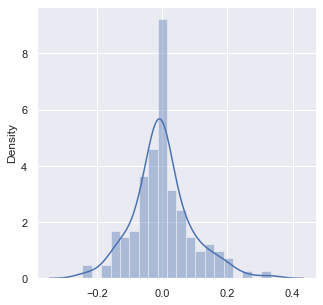

In [108]:
sns.set({"figure.figsize":(5,5)})
res=y_train-y_train_price
sns.distplot(res,bins=20)
plt.show()

# Lets try Q-Q Plot as well

In [109]:
import scipy.stats as stat
import pylab

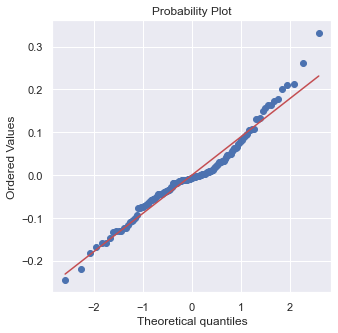

In [110]:
stat.probplot(res,dist="norm",plot=pylab)
plt.show()

# Making Predictions

In [111]:
df_test[num_var]=scaler.transform(df_test[num_var])

In [112]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,buick,bmw,audi,plymouth,saab,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.193548,0.887097,0.177419,0.564516,0.080645,0.338710,0.451613,0.096774,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.398304,0.319058,0.385142,0.499868,0.274512,0.477134,0.501716,0.298064,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [113]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [114]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
cols

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [115]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[cols]
X_test_rfe2.head(3)

,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,fueltype_gas,enginelocation_rear,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_three,cylindernumber_twelve
160,0.341667,0.235066,0.139623,0.404762,0.424242,0.125,0.091667,0.265306,1,0,1,0,0,0,0
186,0.433333,0.305275,0.181132,0.404762,0.611111,0.125,0.154167,0.448980,1,0,1,0,0,0,0
59,0.516667,0.347944,0.230189,0.563492,0.606061,0.100,0.150000,0.265306,1,0,1,0,0,0,0


In [116]:
X.head()

,enginesize,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_twelve
122,0.139623,0,1,0,0
125,0.339623,0,1,0,0
166,0.139623,0,0,0,0
1,0.260377,0,0,0,0
199,0.260377,0,1,0,0


In [117]:
var_rem=[i for i in cols if i not in X.columns]
var_rem

['carwidth',
 'curbweight',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'fueltype_gas',
 'enginetype_ohcv',
 'cylindernumber_three']

In [118]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(var_rem, axis = 1)

In [119]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  62 non-null     float64
 1   enginesize             62 non-null     float64
 2   enginelocation_rear    62 non-null     uint8  
 3   enginetype_ohc         62 non-null     uint8  
 4   enginetype_rotor       62 non-null     uint8  
 5   cylindernumber_twelve  62 non-null     uint8  
dtypes: float64(2), uint8(4)
memory usage: 1.7 KB


In [120]:
# Making predictions
y_pred = lr.predict(X_test_rfe2)

In [121]:
y_pred.head(5)

160    0.083316
186    0.141227
59     0.209668
165    0.039608
140    0.092255
dtype: float64

In [122]:
y_test.head()

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
Name: price, dtype: float64

Text(0, 0.5, 'y_pred')

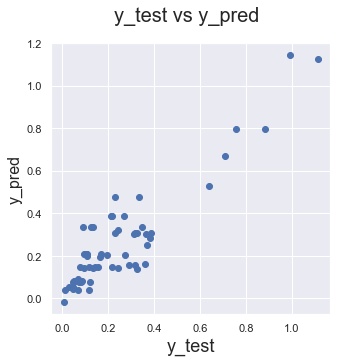

In [123]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

 From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [124]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8119330560336955

Thus, for the model with 5 variables, the r-squared on training and test data is about 82.5% and 81.19% respectively. The adjusted r-squared on the train set is about is about 81.1%.

#### Checking the correlations between the final predictor variables

In [125]:
var_rem

['carwidth',
 'curbweight',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'fueltype_gas',
 'enginetype_ohcv',
 'cylindernumber_three']

In [126]:
# Dropping the variables
col2 = cols.drop(var_rem)
col2

Index(['enginesize', 'enginelocation_rear', 'enginetype_ohc',
       'enginetype_rotor', 'cylindernumber_twelve'],
      dtype='object')

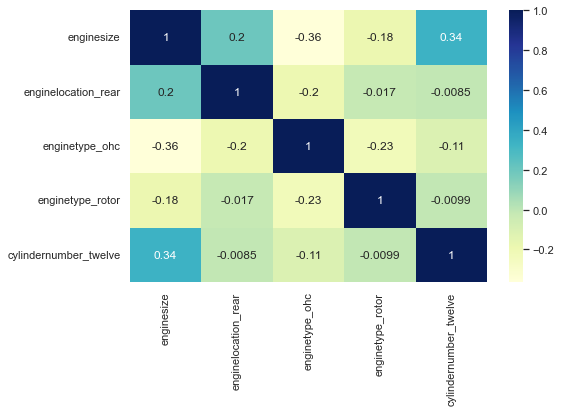

In [127]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(car_nw[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

# Saving the model

In [128]:
import pickle

In [129]:
pickle.dump(lr,open("Car_Price_Prediction.pickle","wb"))

In [130]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5680-DAE4

 Directory of C:\Users\Honey\Downloads\Documents\Python_practise\MAchine Learning\Assingment_ML(CarPrice)

09/23/2021  01:46 PM    <DIR>          .
09/23/2021  01:46 PM    <DIR>          ..
09/22/2021  11:22 PM    <DIR>          .ipynb_checkpoints
09/23/2021  01:46 PM           123,376 Car_Price(Multiple Regression).ipynb
09/23/2021  01:48 PM            28,032 Car_Price_Prediction.pickle
09/22/2021  10:25 PM         1,732,036 Car+Price+Prediction+-+Assignment+Solution.ipynb
09/20/2021  06:25 PM            26,717 CarPrice_Assignment.csv
09/20/2021  06:25 PM            14,884 Data Dictionary - carprices.xlsx
               5 File(s)      1,925,045 bytes
               3 Dir(s)  51,580,174,336 bytes free


# Regularization

In [160]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

# Find Alpha parameter

In [145]:
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64

In [148]:
lassocv=LassoCV(alphas=None,cv=50,max_iter=1000,normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=50, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [149]:
lassocv.alpha_

0.0003864010172730974

# Fitting the model

In [150]:
ls_mo=Lasso(alpha=lassocv.alpha_)
ls_mo.fit(X_train,y_train)

Lasso(alpha=0.0003864010172730974, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# Checking the acuracy

In [156]:
#As in df_train we removed the multicollinear variables
X_test_chk=X_test[X_train.columns]
X_test_chk

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,toyota,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
186,0.8,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
59,0.6,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
165,0.6,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
140,0.8,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.2,0.575862,0.544715,0.358333,1.061947,0.406129,0.230189,0.523810,0.641414,0.09375,0.166667,0.346939,0.305556,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
29,1.0,0.320690,0.521951,0.500000,0.212389,0.513189,0.358491,0.730159,0.863636,0.00000,0.404167,0.346939,0.166667,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
182,0.8,0.368966,0.497561,0.433333,0.699115,0.299845,0.135849,0.261905,0.611111,1.00000,0.016667,0.265306,0.666667,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
40,0.4,0.341379,0.557724,0.183333,0.557522,0.342901,0.184906,0.373016,0.702020,0.12500,0.158333,0.673469,0.388889,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [157]:
ls_mo.score(X_test_chk,y_test)

0.9039943063430992

# Ridge

In [162]:
ridge=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)

## Finding alpha in ridge

In [166]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([1.92384437, 2.32863824, 3.54065956, 7.84656746, 9.38356356,
       7.87210123, 0.07766092, 8.08456855, 6.36428415, 7.98536113,
       5.72316956, 0.28646717, 8.03117091, 0.76360908, 3.48249813,
       5.40593165, 2.85874885, 7.59718969, 9.74131991, 4.62579135,
       9.52763826, 9.17032929, 8.18270059, 7.26854538, 0.20026536,
       9.01612841, 5.72589311, 1.31566381, 6.91398596, 2.71889447,
       6.91741613, 0.80428486, 9.75053642, 0.66527309, 8.67711265,
       3.15892381, 2.93095619, 3.94981068, 7.72559457, 1.99762125,
       4.47082498, 4.88801681, 9.07523208, 5.54849907, 6.38653581,
       8.94081535, 3.3335425 , 0.72247725, 7.88511546, 7.58735424]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [167]:
ridge.alpha_

0.07766092408525105

### Fitting the model according to alpha

In [168]:
rig=Ridge(alpha=ridge.alpha_)
rig.fit(X_train,y_train)

Ridge(alpha=0.07766092408525105, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Calculating the score

In [171]:
rig.score(X_test_chk,y_test)

0.907288100944057

# ElasticNET Regression

In [172]:
elastic=ElasticNetCV(alphas=None,cv=10)
elastic.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [173]:
elastic.alpha_

0.0010500145515156237

In [174]:
elastic.l1_ratio

0.5

## fitting train Model

In [176]:
elastic_lr=ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio)
elastic_lr.fit(X_train,y_train)

ElasticNet(alpha=0.0010500145515156237, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

# Checking Score

In [177]:
elastic_lr.score(X_test_chk,y_test)

0.8852065453810092

## Checking the model by passing one value

In [231]:
# Reshaping to (1,39)
vals=X_test_chk.iloc[0].values
b=vals.reshape(1,-1)
b.shape

(1, 39)

In [232]:
# Passing the very first row into  dataframe
val=pd.DataFrame(b,columns=cols,index=[160])
val

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,toyota,fueltype_gas,aspiration_turbo,doornumber_doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.125,0.091667,0.265306,0.694444,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [233]:
# Making predictions
y_pred_elastic = elastic_lr.predict(val)

In [234]:
y_pred_elastic

array([0.03922928])

In [237]:
y_test.loc[160]

0.07238168909025611

## The predict price is 0.039 and actual one is 0.723